# Exercise 1-2. Load the image dog.jpg and compute the economy SVD. Compute the relative reconstruction error of the truncated SVD in the Frobenius norm as a function of the rank r. Square this error to compute the fraction of missing variance as a function of r. You may also decide to plot 1 minus the error or missing variance to visualize the amount of norm or variance captured at a given rank r. Plot these quantities along with the cumulative sum of singu- lar values as a function of r. Find the rank r where the reconstruction captures 99% of the total variance. Compare this with the rank r where the reconstruc- tion captures 99% in the Frobenius norm and with the rank r that captures 99% of the cumulative sum of singular values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
plt.rcParams['figure.figsize'] = [16,8]

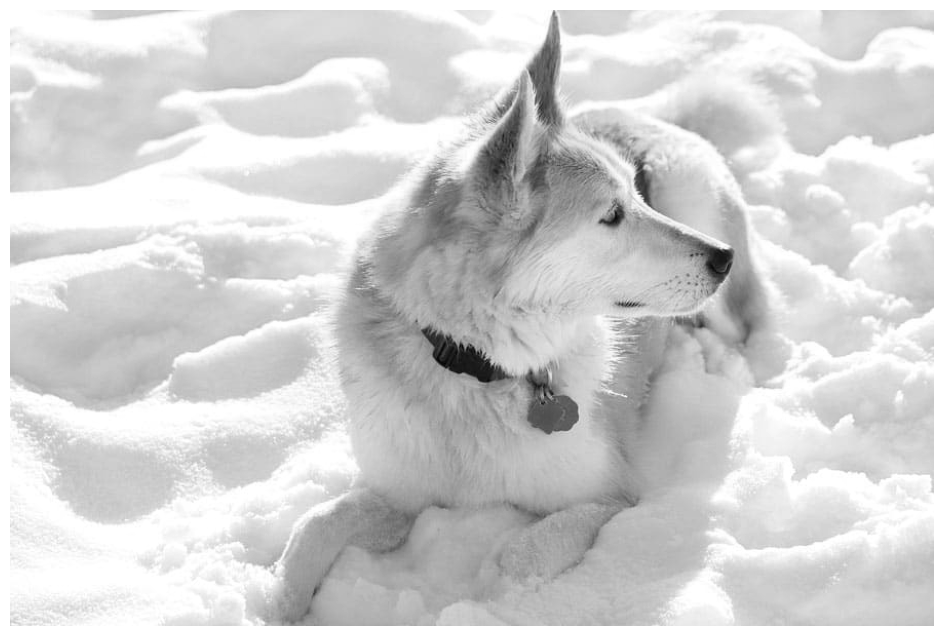

In [3]:
A = imread("/Users/bhaskarspc/Documents/Golden-Retriever-Husky-Mix-.jpg")

X = np.mean(A, -1)
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [4]:
# Calculating economy SVD of the image
U, S, VT = np.linalg.svd(X, full_matrices=False)

In [5]:
n = min(X.shape)
print(n)
total_variance = np.sum(S**2)
errors = []

for r in range(1, n + 1):
    reconstructed_Sigma = np.diag(S[:r])
    reconstructed_image = U[:, :r] @ reconstructed_Sigma @ VT[:r, :]
    reconstruction_error = np.linalg.norm(X - reconstructed_image, 'fro')
    relative_error = reconstruction_error / np.linalg.norm(X, 'fro')
    errors.append(relative_error)

600


In [6]:
missing_variance_fraction = [1 - (error**2) for error in errors]

In [7]:
# Calculate the cumulative sum of singular values
cumulative_sum = np.cumsum(S**2) / total_variance

# Set the threshold for capturing 99% of the variance
threshold = 0.99

# Find the rank where the cumulative sum of singular values crosses the threshold
your_cumulative_rank = np.argmax(cumulative_sum >= threshold) + 1

# Find the rank where the reconstruction captures 99% of the total variance
r_99_variance = np.argmax(np.array(missing_variance_fraction) <= (1 - threshold)) + 1

# Find the rank where the reconstruction captures 99% in the Frobenius norm
r_99_frobenius = np.argmax(np.array(errors) <= threshold) + 1

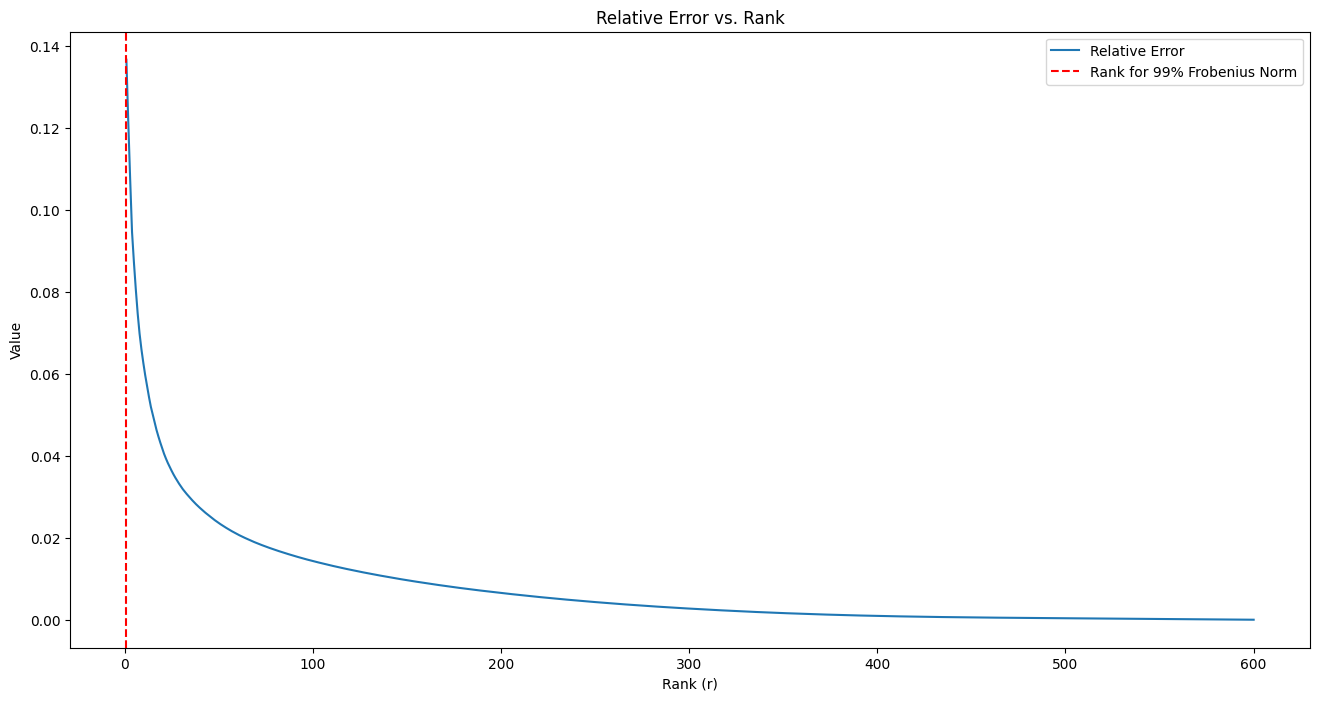

In [8]:
# Plot the results
plt.plot(range(1, n + 1), errors, label='Relative Error')
plt.axvline(x=r_99_frobenius, color='red', linestyle='--', label='Rank for 99% Frobenius Norm')
plt.xlabel('Rank (r)')
plt.ylabel('Value')
plt.title('Relative Error vs. Rank')
plt.legend()
plt.show()

In [15]:
# Print the results
print(f"Rank for 99% Variance Capture: {r_99_variance}")
print(f"Rank for 99% Reconstruction in Frobenius Norm: {r_99_frobenius}")
print(f"Rank for 99% Cumulative Sum of Singular Values: {your_cumulative_rank}")

Rank for 99% Variance Capture: 1
Rank for 99% Reconstruction in Frobenius Norm: 1
Rank for 99% Cumulative Sum of Singular Values: 4


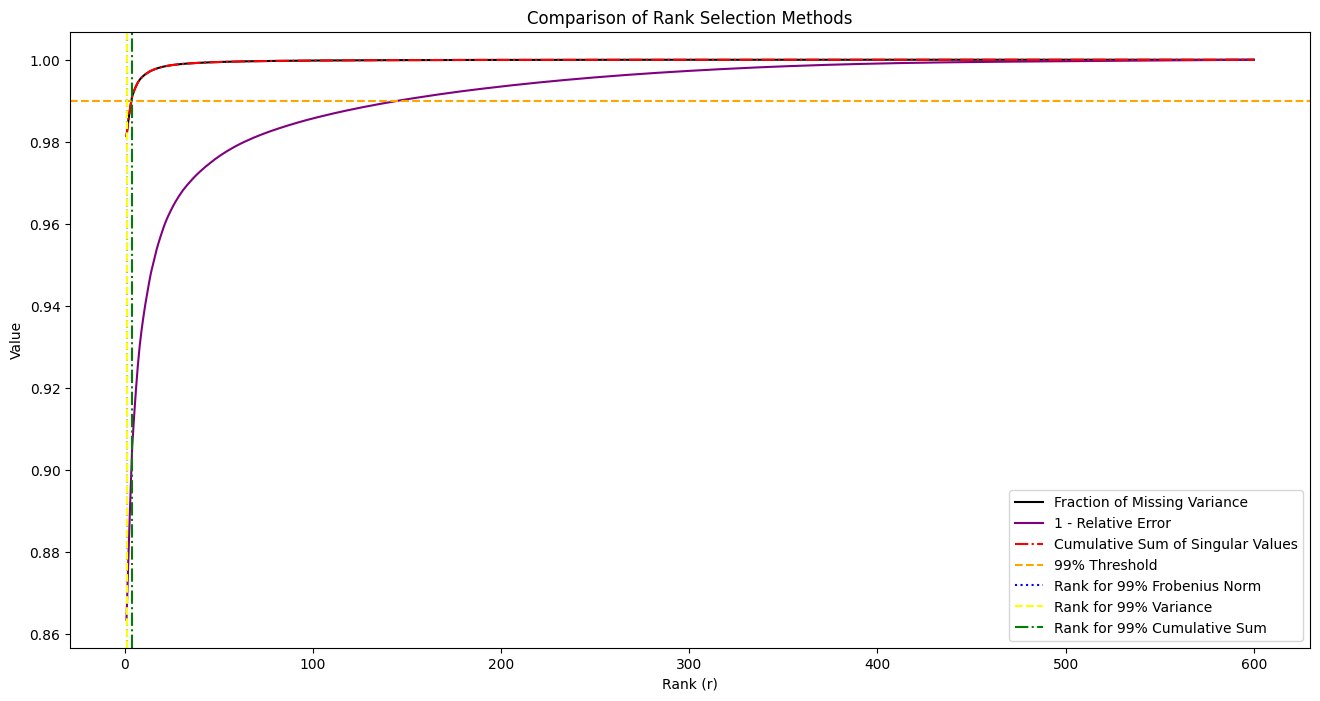

In [56]:
plt.plot(range(1, n + 1), missing_variance_fraction, color='black', label='Fraction of Missing Variance')
plt.plot(range(1, n + 1), 1 - np.array(errors), color='purple', label='1 - Relative Error')
plt.plot(range(1, n + 1), cumulative_sum, color='red', linestyle='-.', label='Cumulative Sum of Singular Values')
plt.axhline(y=threshold, color='orange', linestyle='--', label='99% Threshold')
plt.axvline(x=r_99_frobenius, color='blue', linestyle=':', label='Rank for 99% Frobenius Norm')
plt.axvline(x=r_99_variance, color='yellow', linestyle='--', label='Rank for 99% Variance')
plt.axvline(x=your_cumulative_rank, color='green', linestyle='-.', label='Rank for 99% Cumulative Sum')
plt.xlabel('Rank (r)')
plt.ylabel('Value')
plt.title('Comparison of Rank Selection Methods')
plt.legend()